In [1]:
# !pip install shap

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, plot_confusion_matrix

import shap

import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('../Data/f_win.csv')

In [4]:
data.head()

,Unnamed: 0,venue_code,opp_code,hour,day_code,gf_rolling,ga_rolling,sh_rolling,sot_rolling,dist_rolling,pk_rolling,pkatt_rolling,Win
0,0,1,16,15,5,0.000000,3.000000,9.666667,2.333333,14.833333,0.0,0.0,1
1,1,0,5,15,5,0.333333,2.333333,12.333333,3.000000,14.133333,0.0,0.0,1
2,2,1,19,16,6,0.666667,1.666667,14.666667,3.000000,14.800000,0.0,0.0,1
3,3,0,4,17,5,1.666667,0.333333,18.333333,5.333333,18.433333,0.0,0.0,0
4,4,1,7,20,0,1.333333,0.333333,11.000000,4.000000,19.833333,0.0,0.0,0


In [5]:
data.drop('Unnamed: 0', axis=1, inplace=True)

In [6]:
data.head(1)

,venue_code,opp_code,hour,day_code,gf_rolling,ga_rolling,sh_rolling,sot_rolling,dist_rolling,pk_rolling,pkatt_rolling,Win
0,1,16,15,5,0.0,3.0,9.666667,2.333333,14.833333,0.0,0.0,1


In [7]:
X = data.drop('Win', axis=1)
y = data['Win']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

In [9]:
clf = RandomForestClassifier()

In [10]:
clf.fit(X_train, y_train)

RandomForestClassifier()

In [11]:
y_pred = clf.predict(X_test)

In [12]:
confusion_matrix(y_test, y_pred)

array([[112,  29],
       [ 77,  27]], dtype=int64)

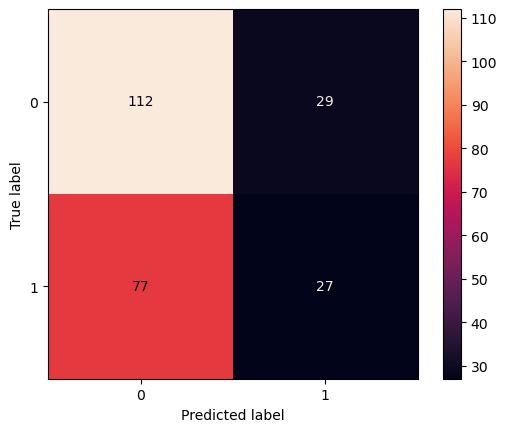

In [13]:
plot_confusion_matrix(clf, X_test, y_test, cmap='rocket');

In [14]:
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)
feature_importances = pd.Series(clf.feature_importances_, index=X_train.columns)

print('Score of RF model on test split\n',clf.score(X_test,y_test))


Score of RF model on test split
 0.5673469387755102


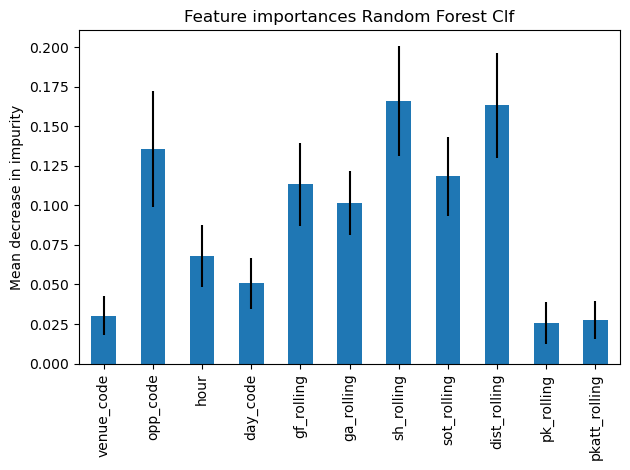

In [15]:
fig, ax = plt.subplots()
feature_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances Random Forest Clf")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
plt.show()

# Shapley Value :

<img src='imgs/shap.png' />

In [16]:
explainer = shap.TreeExplainer(clf)

In [17]:
shap_values = explainer.shap_values(X_train)

<b>shap_values : the average contribution of each feature to each prediction for each sample based on all possible features. It is a (n,m) n — samples, m — features matrix that represents the contribution of each feature to each sample.<b/>

In [18]:
X_train.shape

(734, 11)

In [19]:
shap_values[0]

array([[ 0.07237413,  0.02550468,  0.00748508, ...,  0.02793275,
         0.01244218, -0.00076897],
       [ 0.02212891, -0.09926526, -0.01767265, ..., -0.13756186,
        -0.00974335, -0.0063196 ],
       [ 0.00185238,  0.00447953, -0.01717444, ..., -0.03827846,
        -0.00323833, -0.01402088],
       ...,
       [-0.04012861,  0.04230231,  0.00186319, ...,  0.02168495,
         0.00048433,  0.01108955],
       [ 0.03711777, -0.03581635,  0.00793746, ...,  0.0469489 ,
         0.00063785,  0.00566778],
       [ 0.02649935, -0.0198406 , -0.02668677, ..., -0.02415263,
        -0.00540452, -0.00848918]])

In [20]:
len(shap_values)

2

In [21]:
len(shap_values[1][0])

11

In [22]:
print('Expected Value:', explainer.expected_value)

Expected Value: [0.62741144 0.37258856]


In [23]:
# Shap Values for class = 0 that is  class

print("Shap Values for first class")
pd.DataFrame(shap_values[0],columns=X_train.columns).head()

Shap Values for first class


,venue_code,opp_code,hour,day_code,gf_rolling,ga_rolling,sh_rolling,sot_rolling,dist_rolling,pk_rolling,pkatt_rolling
0,0.072374,0.025505,0.007485,0.007940,0.049646,0.028691,0.066595,0.054748,0.027933,0.012442,-0.000769
1,0.022129,-0.099265,-0.017673,-0.030089,-0.034016,-0.057589,-0.024081,-0.073203,-0.137562,-0.009743,-0.006320
2,0.001852,0.004480,-0.017174,-0.009481,-0.067683,-0.026253,-0.259979,-0.067635,-0.038278,-0.003238,-0.014021
3,0.043938,0.004381,-0.002048,-0.002143,-0.001112,0.040511,0.098393,0.031243,0.037892,-0.002204,0.003738
4,-0.084019,-0.017923,-0.014791,-0.051115,-0.033184,-0.062904,0.009678,-0.108427,-0.016349,-0.002530,-0.005848


In [24]:
# Shap Values for class =1 that is  class
print("Shap Values for second class")
pd.DataFrame(shap_values[1],columns=X_train.columns).head()

Shap Values for second class


,venue_code,opp_code,hour,day_code,gf_rolling,ga_rolling,sh_rolling,sot_rolling,dist_rolling,pk_rolling,pkatt_rolling
0,-0.072374,-0.025505,-0.007485,-0.007940,-0.049646,-0.028691,-0.066595,-0.054748,-0.027933,-0.012442,0.000769
1,-0.022129,0.099265,0.017673,0.030089,0.034016,0.057589,0.024081,0.073203,0.137562,0.009743,0.006320
2,-0.001852,-0.004480,0.017174,0.009481,0.067683,0.026253,0.259979,0.067635,0.038278,0.003238,0.014021
3,-0.043938,-0.004381,0.002048,0.002143,0.001112,-0.040511,-0.098393,-0.031243,-0.037892,0.002204,-0.003738
4,0.084019,0.017923,0.014791,0.051115,0.033184,0.062904,-0.009678,0.108427,0.016349,0.002530,0.005848


SHAP Force Plot
These help us visualise each feature and how they force or drive the predictions and in which direction for each class. By default 'RED' drives up probability to higher and blue drives down the prob from base value.

- Force Plot can be for a single instance or data (local interpretations)
- Force plot for all data points

In [25]:
X_train.head()

,venue_code,opp_code,hour,day_code,gf_rolling,ga_rolling,sh_rolling,sot_rolling,dist_rolling,pk_rolling,pkatt_rolling
121,0,10,14,6,1.333333,1.666667,7.000000,2.666667,18.166667,0.333333,0.333333
832,0,17,16,6,2.333333,1.000000,13.000000,5.666667,13.866667,0.000000,0.000000
187,0,0,15,5,0.000000,1.333333,17.666667,2.333333,18.466667,0.000000,0.333333
108,0,10,15,5,0.666667,2.000000,8.666667,3.333333,15.066667,0.000000,0.000000
816,1,8,20,0,2.333333,1.000000,11.000000,5.666667,15.533333,0.000000,0.000000


In [26]:
X_train.iloc[0]

venue_code        0.000000
opp_code         10.000000
hour             14.000000
day_code          6.000000
gf_rolling        1.333333
ga_rolling        1.666667
sh_rolling        7.000000
sot_rolling       2.666667
dist_rolling     18.166667
pk_rolling        0.333333
pkatt_rolling     0.333333
Name: 121, dtype: float64

In [27]:
y_train.iloc[0]

0

In [28]:
#Force Plot for a single observation for a single class 0
shap.initjs()
shap.force_plot(explainer.expected_value[0],
shap_values[0][0,:], X_train.iloc[0])

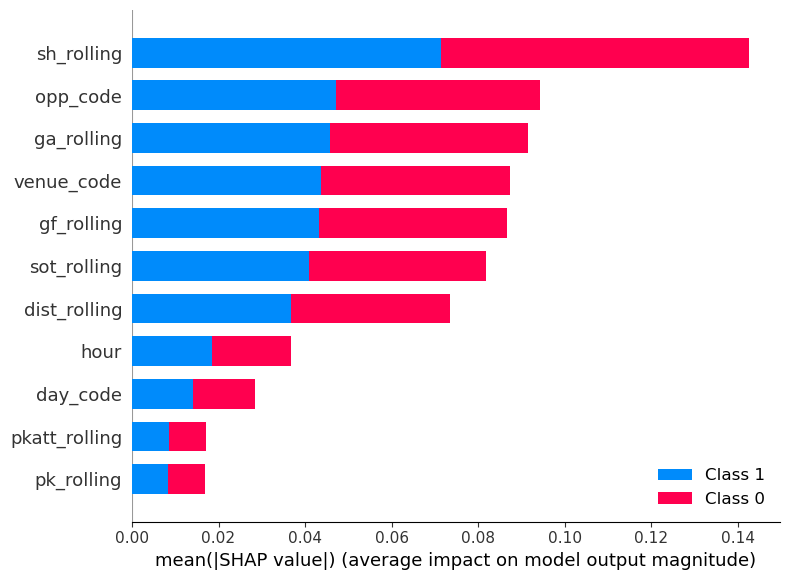

In [29]:
shap.initjs()
shap.summary_plot(shap_values, X_test)

## Summary Plot for Single Class

### Red means low feature value and blue means high feature value. As we can see low values of our features drives up the prob of belonging to class 0.

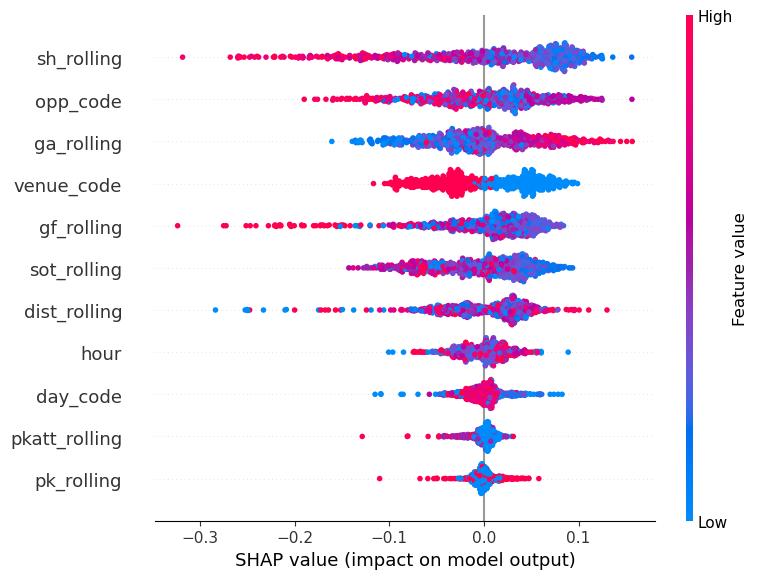

In [30]:
shap.initjs()
shap.summary_plot(shap_values[0], X_train)

## SHAP Decision Plot

SHAP decision plots show how complex models arrive at their predictions (i.e., how models make decisions). A decision plot can reveal how predictions change across a set of feature values. This method is useful for presenting hypothetical scenarios and exposing model behaviors.

In [31]:
# creating an explainer for our model
explainer = shap.TreeExplainer(clf)

# finding out the shap values using the explainer
shap_values_test = explainer.shap_values(X_test)

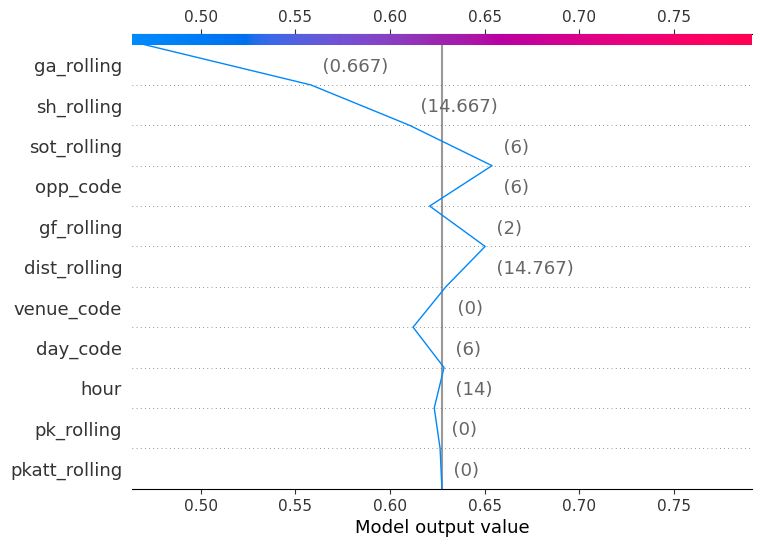

In [32]:
shap.initjs()
shap.decision_plot(explainer.expected_value[0], 
                shap_values_test[0][0,:], X_test.iloc[0,:])